<a href="https://colab.research.google.com/github/rxshoumoun/CodSoft/blob/main/Sales%20Analysis/Sales_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('advertising.csv')
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [4]:
data.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [5]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


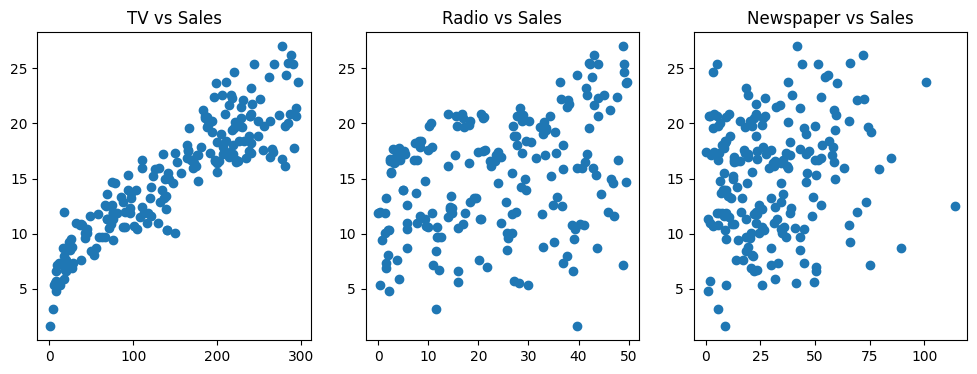

In [6]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.scatter(data['TV'], data['Sales'])
plt.title('TV vs Sales')
plt.subplot(1, 3, 2)
plt.scatter(data['Radio'], data['Sales'])
plt.title('Radio vs Sales')
plt.subplot(1, 3, 3)
plt.scatter(data['Newspaper'], data['Sales'])
plt.title('Newspaper vs Sales')
plt.show()

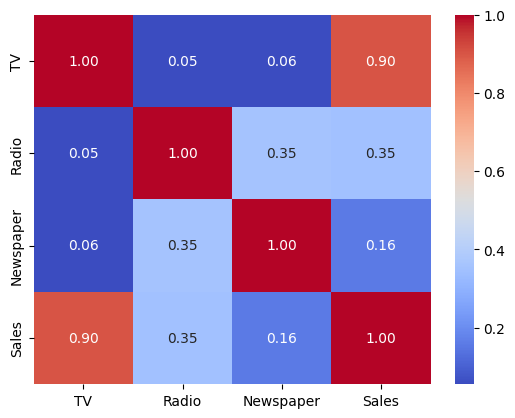

In [7]:
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm' ,fmt='.2f')
plt.show()

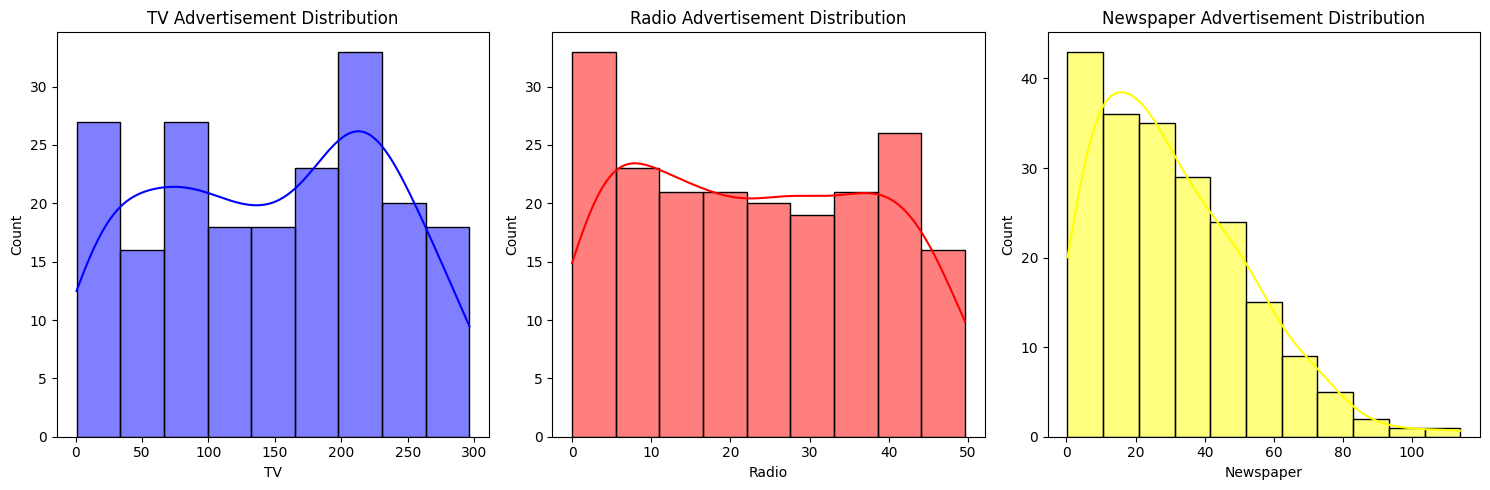

In [8]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(data['TV'], kde=True, color='blue')
plt.title('TV Advertisement Distribution')
plt.subplot(1, 3, 2)
sns.histplot(data['Radio'], kde=True, color='red')
plt.title('Radio Advertisement Distribution')
plt.subplot(1, 3, 3)
sns.histplot(data['Newspaper'], kde=True, color='yellow')
plt.title('Newspaper Advertisement Distribution')
plt.tight_layout()
plt.show()

In [9]:
X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_pred = linear_model.predict(X_test)

In [13]:
linear_mse = mean_squared_error(y_test, linear_pred)
linear_r2 = r2_score(y_test, linear_pred)
print("Linear Regression:")
print(f'Mean Squared Error: {linear_mse}')
print(f'R-squared: {linear_r2}')

Linear Regression:
Mean Squared Error: 2.9077569102710896
R-squared: 0.9059011844150826


In [25]:
tv_ip = float(input("Enter TV Advertisement: "))
radio_ip = float(input("Enter Radio Advertisement: "))
newspaper_ip = float(input("Enter Newspaper Advertisement: "))
input_data = np.array([[tv_ip, radio_ip, newspaper_ip]])

Enter TV Advertisement: 123.45
Enter Radio Advertisement: 34.5
Enter Newspaper Advertisement: 23.5


In [26]:
predicted_sales = linear_model.predict(input_data)
print(f'Predicted Sales: {predicted_sales[0]}')

Predicted Sales: 15.027822089943685


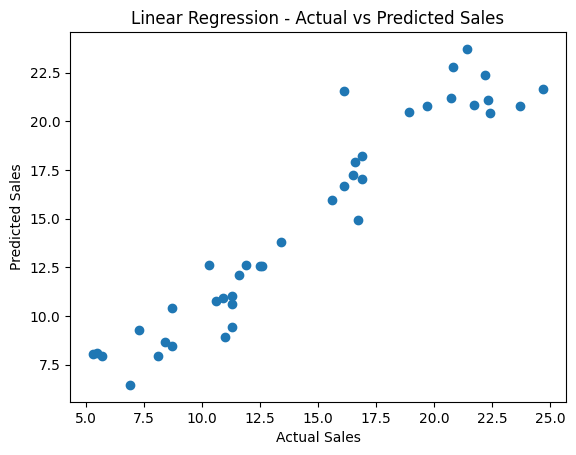

In [16]:
plt.scatter(y_test, linear_pred)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Linear Regression - Actual vs Predicted Sales')
plt.show()

In [18]:
rf= RandomForestRegressor()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

In [19]:
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)
print("Random Forest Regressor:")
print(f'Mean Squared Error: {rf_mse}')
print(f'R-squared: {rf_r2}')

Random Forest Regressor:
Mean Squared Error: 1.4610530750000037
R-squared: 0.9527184121277235


In [21]:
tv_ip = float(input("Enter TV Advertisement: "))
radio_ip = float(input("Enter Radio Advertisement: "))
newspaper_ip = float(input("Enter Newspaper Advertisement: "))
input_data = np.array([[tv_ip, radio_ip, newspaper_ip]])

Enter TV Advertisement: 123.56
Enter Radio Advertisement: 35.7
Enter Newspaper Advertisement: 89.03


In [22]:
predicted_sales = rf.predict(input_data)
print(f'Predicted Sales: {predicted_sales[0]}')

Predicted Sales: 15.643000000000018


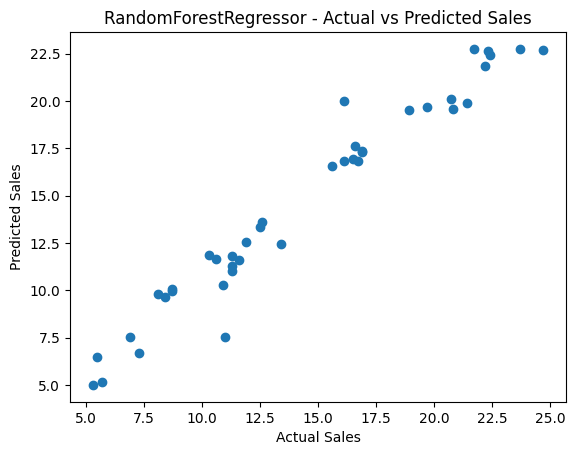

In [23]:
plt.scatter(y_test, rf_pred)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('RandomForestRegressor - Actual vs Predicted Sales')
plt.show()